In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date
import function as fun

# # Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (6, 29)
lng_range = (-80, -108)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-6.000, high=29.000, size=1500)
lngs = np.random.uniform(low=-80.000, high=-108.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

349

In [3]:
# build URL to make API call based on weather data from 1/1/2008 - 12/1/2010
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&type=hour&start={1199145600}&end={1293753600}&q="

# Create the Lists to be used in the Dictionary for the Data Frame
name = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
min_temp = []
wind_speed = []
counter = 0

# Loop through the entire list of cities and request data for each city
for city in cities:
    try:
        city_response = requests.get(query_url + city).json()
        name.append(city_response['name'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
        humidity.append(city_response['main']['humidity'])
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        min_temp.append(city_response['main']['temp_min'])
        wind_speed.append(city_response['wind']['speed'])
        counter += 1
        print(f"Processing Request {counter} | {city}")
        time.sleep(2)
    except Exception:
        print(f"City not found -- Skipping: {city}")

Processing Request 1 | paredon
Processing Request 2 | puerto ayora
Processing Request 3 | creel
Processing Request 4 | san cristobal
Processing Request 5 | coahuayana
Processing Request 6 | acapulco
Processing Request 7 | san jeronimo
Processing Request 8 | celestun
Processing Request 9 | ocampo
Processing Request 10 | esmeraldas
Processing Request 11 | salinas
Processing Request 12 | rodeo
City not found -- Skipping: muzquiz
Processing Request 13 | nombre de dios
Processing Request 14 | houma
Processing Request 15 | acajutla
Processing Request 16 | bahia honda
Processing Request 17 | edgewater
Processing Request 18 | san patricio
Processing Request 19 | hopelchen
Processing Request 20 | rockport
Processing Request 21 | savannah bight
Processing Request 22 | armeria
Processing Request 23 | freeport
Processing Request 24 | puerto escondido
Processing Request 25 | tecoanapa
Processing Request 26 | isla mujeres
Processing Request 27 | bonanza
Processing Request 28 | sayaxche
Processing Re

Processing Request 221 | tlanchinol
City not found -- Skipping: puerto cortes
Processing Request 222 | quila
Processing Request 223 | bocas del toro
Processing Request 224 | nautla
City not found -- Skipping: guata
Processing Request 225 | jiquipilas
Processing Request 226 | rosamorada
Processing Request 227 | papayal
Processing Request 228 | bayshore gardens
Processing Request 229 | pital
Processing Request 230 | dolores
Processing Request 231 | jaguey grande
Processing Request 232 | jaltenango
Processing Request 233 | tuxpan
Processing Request 234 | jalpa
Processing Request 235 | tiquicheo
Processing Request 236 | allende
Processing Request 237 | la orilla
Processing Request 238 | ostuacan
City not found -- Skipping: teul
Processing Request 239 | guane
Processing Request 240 | barillas
Processing Request 241 | venustiano carranza
Processing Request 242 | alpoyeca
Processing Request 243 | destin
Processing Request 244 | aramecina
Processing Request 245 | san juan tecuaco
Processing Re

In [6]:
CA_list = pd.DataFrame(
    {'City': name,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Wind Speed': wind_speed})
     
CA_list.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Paredon,MX,1584366220,59,16.03,-93.87,85.55,17.69
1,Puerto Ayora,EC,1584366222,88,-0.74,-90.35,80.01,4.70
2,Creel,MX,1584366224,57,27.75,-107.63,53.33,3.85
3,San Cristobal,VE,1584366247,83,7.77,-72.22,75.20,2.24
4,Coahuayana Viejo,MX,1584366249,88,18.73,-103.68,69.80,2.59


In [8]:
# load new df to csv
CA_list.to_csv(r'~/Desktop/RiceData/Homework/Projects/Data-Analysis-Project-1/Data/Kati_Data/Data_Maps/CA_list.csv', index = False)

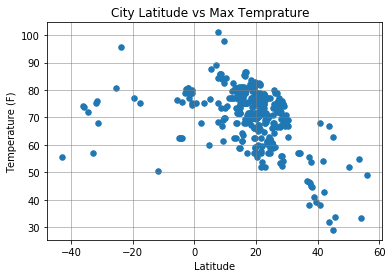

In [9]:
# create Lat vs. Max Temp correlation scatter plot
title = "City Latitude vs Max Temprature" + "  "
temp_plot = CA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/CA_lat_temp.png')

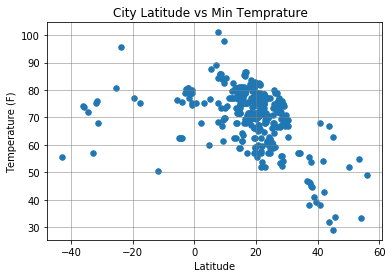

In [10]:
# create Lat vs. Min Temp correlation scatter plot
title = "City Latitude vs Min Temprature" + "  "
temp_plot = CA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/CA_lat_temp.png')

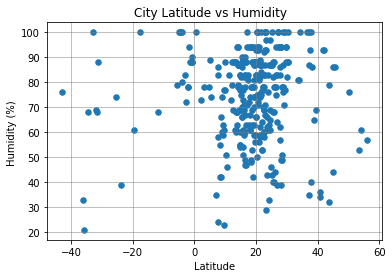

In [11]:
title = "City Latitude vs Humidity" + "  "
temp_plot = CA_list.plot.scatter(x='Lat',
                      y='Humidity',s=30,title=title)
temp_plot.set_ylabel("Humidity (%) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/CA_lat_humidity.png')

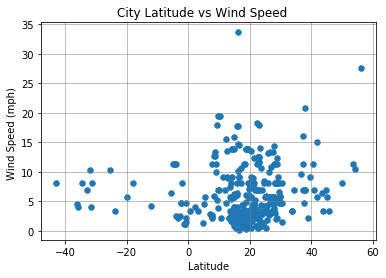

In [12]:
# create Lat vs. Wind Speed scatter plot
title = "City Latitude vs Wind Speed " + "  "
temp_plot = CA_list.plot.scatter(x='Lat',
                      y='Wind Speed',s=30,title=title)
temp_plot.set_ylabel("Wind Speed (mph) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/CA_lat_windspeed.png')

## Linear Regression

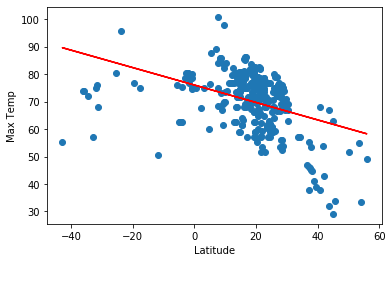

In [13]:
# create linear regressions for Northern Hemisphere - Max Temp vs. Latitude
x_values = CA_list['Lat']
y_values = CA_list['Max Temp']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

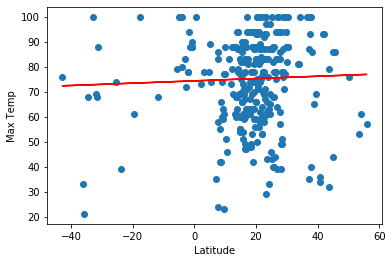

In [14]:
# create linear regressions for Humidity vs. Latitude
x_values = CA_list['Lat']
y_values = CA_list['Humidity']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

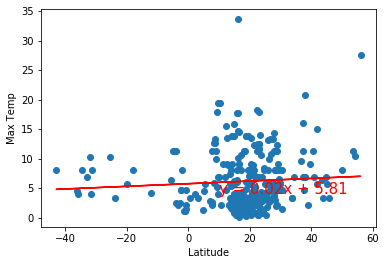

In [15]:
# create linear regressions for Wind Speed vs. Latitude
x_values = CA_list['Lat']
y_values = CA_list['Wind Speed']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')